In [57]:
import pandas as pd
import re
import ast
import matplotlib.pyplot as plt
from docx import Document
import locale
locale.setlocale(locale.LC_ALL, "nl_NL")

'nl_NL'

In [58]:
with open('paper_selectors.txt', 'r') as file:
    papers = ast.literal_eval(file.read())

with open('party_selectors.txt', 'r') as file:
    parties = ast.literal_eval(file.read())

with open('party_synonyms.txt', 'r') as file:
    party_synonyms = ast.literal_eval(file.read())

with open('months.txt', 'r') as file:
    months = ast.literal_eval(file.read())

with open('min_mentions_per_article.txt', 'r') as file:
    min_val = int(file.read())

In [59]:
df1 = pd.read_json("../../data/01_cleaned_articles.json")

In [60]:
def find_topics(word: str, party: str) -> int:
    temp = len(re.findall(rf'\b{party}\b', word))
    if temp > 0:
        return temp
    else:
        return 0

df1 = df1[df1['Body'].notna()]

full_list = parties + party_synonyms

for party in parties:
    df1[party] = df1['Body'].apply(find_topics, party=party)

display(df1)

,Newspaper,Title,Date,Author,Section,Body,VVD,PvdA,CDA,D66,...,Forum voor Democratie,FvD,Bij1,BBB,Volt,BVNL,Belang van Nederland,van Haga,Nieuw Sociaal Contact,NSC
0,AD/Algemeen Dagblad.nl,Van Leeuwen neemt na vijf maanden alweer afsch...,2023-08-21,Albert Sok,None,In maart nog maakte PVV’er Dan van Leeuwen de ...,0,0,0,0,...,2,0,0,0,0,3,1,1,0,0
1,AD/Algemeen Dagblad.nl,Omtzigts nieuwe partij is slecht nieuws voor B...,2023-08-21,Marcia Nieuwenhuis,None,Dat Pieter Omtzigt met een eigen partij meedoe...,1,2,1,0,...,1,0,0,5,1,0,0,0,0,3
2,AD/Algemeen Dagblad.nl,Dan van Leeuwen wil zich alwéér afsplitsen en ...,2023-08-21,Albert Sok,None,In maart maakte de Dordtse PVV’er Dan van Leeu...,0,0,0,0,...,3,0,0,0,0,8,1,1,0,0
3,AD/Algemeen Dagblad.nl,Omtzigt mengt zich in strijd met boek vol plan...,2023-08-21,Niels Klaassen,None,Pieter Omtzigt mikt op gematigde groei met zij...,2,2,5,0,...,1,0,0,4,0,0,0,0,0,4
4,Het Parool.nl,Plofpartij of gamechanger: wat kunnen we verwa...,2023-08-21,Niels Klaassen,None,Pieter Omtzigt mikt op gematigde groei met zij...,2,2,6,0,...,1,0,0,6,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30187,De Volkskrant.nl,Ooit was er deze leesbevorderende slogan: ‘Als...,2023-12-06,Paulien Cornelisse,None,De leesvaardigheid onder 15-jarigen ‘blijft ac...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30188,AD/Algemeen Dagblad.nl,Sinterklaasbombardement op Eindhoven opnieuw h...,2023-12-06,Ad de Koning,None,EINDHOVEN - Met een sobere plechtigheid bij he...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30189,De Volkskrant.nl,Als de lezer op het verkeerde been wordt gezet...,2023-12-06,Rogier Goetze,None,Om de week schrijft Rogier Goetze over wat hem...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30190,AD/Algemeen Dagblad.nl,FC Trias JO17-1 verliest thuis tegen Bon Boys ...,2023-12-06,Automatisch bericht,None,FC Trias JO17-1 is met 1-4 verslagen in haar t...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df2 = pd.DataFrame()
for party in parties:
    df2 = pd.concat([df2, df1[df1[party].ge(min_val)]])

df2 = df2.drop_duplicates().reset_index(drop=True)
df2 = df2.drop_duplicates(['Title', 'Newspaper']).reset_index(drop=True)
df2 = df2[df2['Body'].str.contains("NSC Nijkerk" and "voetbal") == False]

display(df2)

,Newspaper,Title,Date,Author,Section,Body,VVD,PvdA,CDA,D66,...,Forum voor Democratie,FvD,Bij1,BBB,Volt,BVNL,Belang van Nederland,van Haga,Nieuw Sociaal Contact,NSC
0,AD/Algemeen Dagblad.nl,Omtzigt mengt zich in strijd met boek vol plan...,2023-08-21,Niels Klaassen,None,Pieter Omtzigt mikt op gematigde groei met zij...,2,2,5,0,...,1,0,0,4,0,0,0,0,0,4
1,Het Parool.nl,Plofpartij of gamechanger: wat kunnen we verwa...,2023-08-21,Niels Klaassen,None,Pieter Omtzigt mikt op gematigde groei met zij...,2,2,6,0,...,1,0,0,6,0,0,0,0,0,6
2,de Volkskrant,Kaarten op rechts zijn opnieuw geschud,2023-08-21,RAOUL DU PRÉ,Ten Eerste,"Analyse VVD sluit PVV niet uit Frans Weisglas,...",15,1,2,2,...,0,1,0,1,0,0,0,0,0,0
3,Trouw,Niet met de PVV,2023-08-21,STEVO AKKERMAN,Vandaag,Toen Dilan Yesilgöz zich opwierp als opvolger...,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AD/Algemeen Dagblad.nl,VVD-kamerlid en woordvoerder sport Rudmer Heer...,2023-08-21,Politieke redactie,None,VVD-Kamerlid Rudmer Heerema keert na de aankom...,4,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7865,Trouw,Ook vervuiling tast onze bestaanszekerheid aan,2023-11-27,SIJAS AKKERMAN,Opinie,"Leefomgeving Nieuw Sociaal Contract (NSC), de ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
7866,AD/Algemeen Dagblad.nl,Pieter Omtzigt na veronrustend rapport over Vu...,2023-12-01,Lucien Baard,None,„Dit is dus wat er gebeurt wanneer je als rege...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
7867,De Volkskrant.nl,"Veel pensioenen stijgen, maar de verschillen z...",2023-12-01,Hessel von Piekartz,None,Veel pensioengerechtigden zien hun pensioen oo...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
7871,de Volkskrant,"Veel fondsen verhogen de pensioenen, maar zijn...",2023-12-02,HESSEL VON PIEKARTZ,Ten Eerste,Elk jaar kijken de fondsen weer of ze de pensi...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [62]:
for synonym in party_synonyms:
    df2[synonym[0]] = df2[synonym].max(axis=1)
    df2 = df2.drop(synonym[1:], axis=1)

    parties = [x for x in parties if x not in synonym[1:]]

In [63]:
spam_indices = df2[(df2['Date'] == "2023-08-24") & (df2['Body'].str.contains("Hoe populair is Pieter Omtzigt") == True)].index
df2.drop(index=spam_indices, inplace=True)

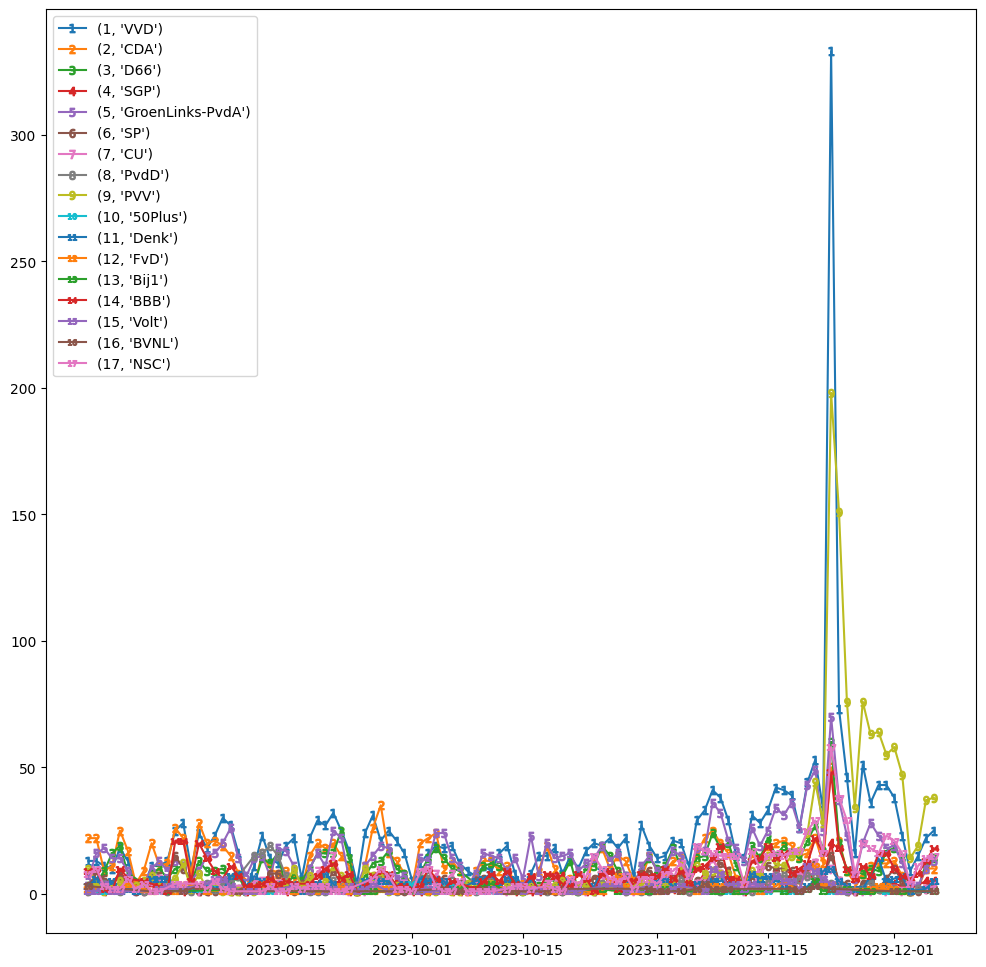

In [64]:
plt.figure(figsize=[12,12])

for idx, party in enumerate(parties):
    tdf = df2[party].ge(2)
    temp = df2[tdf].groupby(df2['Date'])[party].count()
    plt.plot(temp, marker='${}$'.format(idx + 1), label=(idx + 1 , party))

plt.legend()
plt.show()

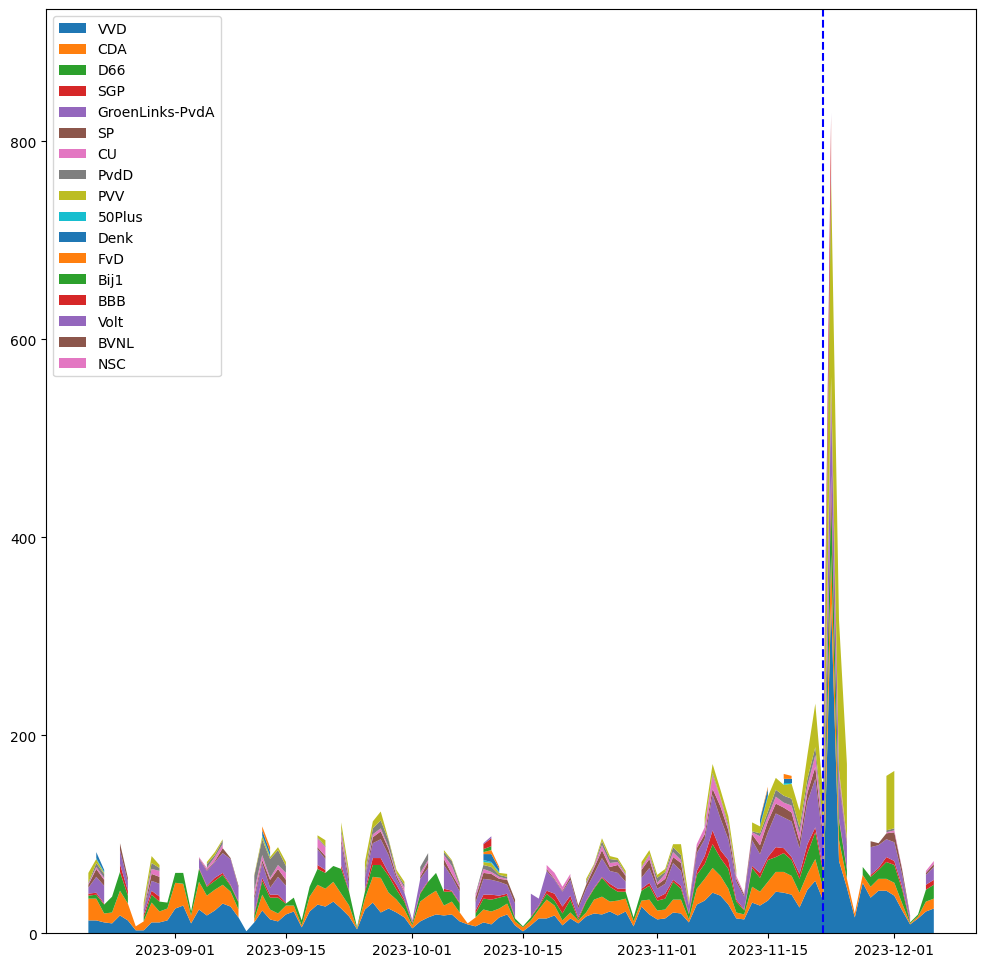

In [121]:
from datetime import datetime

plt.figure(figsize=[12,12])

freq = pd.DataFrame()

for party in parties:
    tdf = df2[party].ge(2)
    temp = df2[tdf].groupby(df2['Date'])[party].count()
    freq = pd.concat([freq, temp], axis=1)

plt.stackplot(freq.index, freq.T)
plt.axvline(x=pd.Timestamp('2023-11-22'), linestyle='--', color='b')

plt.legend(parties, loc='upper left')
plt.show()

In [66]:
df2.to_json("../../data/02_assigned_articles.json")